In [121]:
# import the data and the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
NbaS = pd.read_csv("NBACurrentData.csv")
NbaA = pd.read_csv("NBAAdvancedData.csv")
EastS = pd.read_csv("NBAStandingsEast.csv")
WestS = pd.read_csv("NBAStandingsWest.csv")
ODDS = pd.read_csv("CurrentOdds.csv")
#WestS.head()

In [122]:
# List of all NBA teams
#teams = NbaS["TEAM"]
#print(teams    

In [123]:
# Gather all contenders for east and west
ContendersE = (EastS[EastS["RANK"] < 11 ] )
ContendersW = (WestS[ WestS["RANK"] < 11 ] )
#ContendingTeams = ("East: ") + ContendersE["TEAM"] + (", West: ") + ContendersW["TEAM"]
#print(ContendingTeams)

In [124]:
# Isolate the contenders from each conference

eastern_contenders = list(ContendersE["TEAM"])
western_contenders = list(ContendersW["TEAM"])

# Show Advanced States of all Contenders as well as rank
ChampionContenders = NbaS[ (NbaS["TEAM"].isin(eastern_contenders)) | (NbaS["TEAM"].isin(western_contenders))]
#ChampionContendersAdvanced = NbaA[ (NbaA["TEAM"].isin(eastern_list)) | (NbaA["TEAM"].isin(western_list))]

Teams = ChampionContenders["ABB"]

OFFRTG = ChampionContenders["OFFRTG"]
DEFRTG = ChampionContenders["DEFRTG"]

WINP = ChampionContenders["WIN%"]

ThreePP = ChampionContenders["3P%"]
FGP = ChampionContenders["FG%"]
FTP = ChampionContenders["FT%"]
TSP = NbaA["TS%"]

ChampionContenders

,RANK,TEAM,ABB,GP,W,L,WIN%,OFFRTG,DEFRTG,MIN,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PM
0,1,Boston Celtics,BOS,42,32,10,0.762,120.3,110.6,48.6,...,36.4,47.3,25.4,12.7,6,6.3,3.9,17.4,18.9,9.7
1,2,Minnesota Timberwolves,MIN,42,30,12,0.714,114.0,108.5,48.2,...,35.0,44.1,26.2,15.4,8,6.0,4.7,19.6,20.6,5.8
2,3,Milwaukee Bucks,MIL,42,29,13,0.690,120.7,116.9,48.4,...,34.8,44.3,26.7,13.0,7,5.5,4.4,20.2,20.4,4.0
3,3,Oklahoma City Thunder,OKC,42,29,13,0.690,119.8,111.7,48.2,...,32.6,41.0,27.4,12.5,8,6.4,5.2,20.2,19.7,8.1
4,5,Philadelphia 76ers,PHI,41,28,13,0.683,119.5,111.1,48.2,...,32.7,43.6,25.3,12.2,9,6.1,6.0,20.6,20.0,8.2
5,6,Denver Nuggets,DEN,44,30,14,0.682,118.7,113.4,48.0,...,33.3,44.0,29.3,12.6,7,5.4,5.0,18.8,18.9,5.0
6,7,LA Clippers,LAC,41,27,14,0.659,119.6,113.9,48.1,...,32.7,43.1,25.8,13.2,8,5.3,4.6,19.8,20.0,5.8
7,8,Cleveland Cavaliers,CLE,40,25,15,0.625,114.7,110.8,48.3,...,34.2,45.3,26.8,14.0,8,4.5,5.3,19.0,19.4,3.8
8,9,New York Knicks,NYK,43,26,17,0.605,117.3,112.5,48.0,...,33.7,46.3,24.0,13.9,7,3.8,5.3,18.7,20.4,4.6
9,10,New Orleans Pelicans,NOP,43,25,18,0.581,117.2,112.6,48.1,...,33.2,44.2,26.9,13.3,8,4.7,5.2,19.5,19.7,4.4


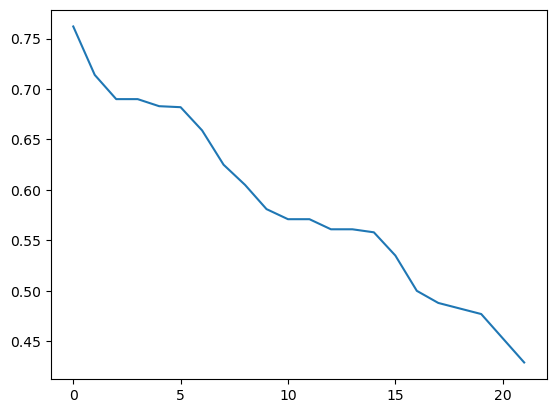

In [125]:
#| label: my-cell
# How much better the top teams are then the bottom play in teams
#| label: my-cell
ChampionContenders["WIN%"].plot()
plt.show()


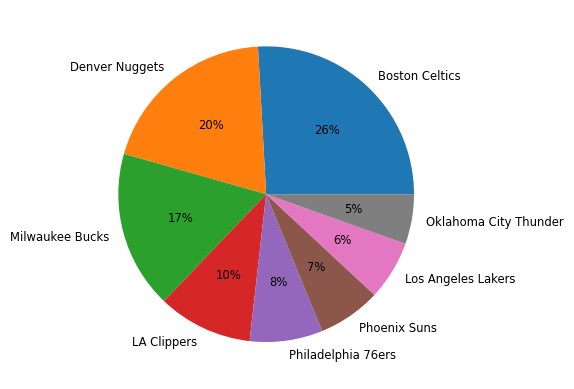

In [126]:
#labels = Teams[0], Teams[1], Teams[2], Teams[3]
#sizes = [WINP[0], WINP[1], WINP[2], WINP[3]]
Odds = ODDS["Odds"]
OddsTeam = ODDS["TEAM"]
#print(Odds)
def calculateOdds(odd):
    odds100 = odd+100
    percentage = (100/(odds100))
    percentage = percentage * 100
    #print(percentage)
    return percentage

#calculateOdds(300)
labels = OddsTeam[0], OddsTeam[1], OddsTeam[2], OddsTeam[3], OddsTeam[4], OddsTeam[5], OddsTeam[6], OddsTeam[7]

sizes = calculateOdds(Odds[0]), calculateOdds(Odds[1]), calculateOdds(Odds[2]), calculateOdds(Odds[3]), calculateOdds(Odds[4]), calculateOdds(Odds[5]), calculateOdds(Odds[6]), calculateOdds(Odds[7])

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%.0f%%',
       textprops={'size': 'smaller'}, radius=1)
plt.show()

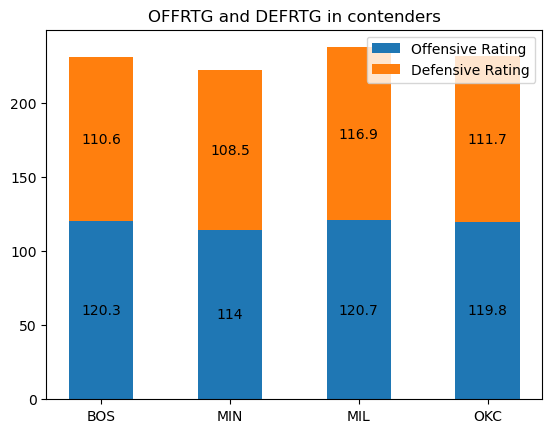

In [127]:
teams = (Teams[0], Teams[1], Teams[2], Teams[3])
ratings = {
    'Offensive Rating': np.array([ OFFRTG[0], OFFRTG[1], OFFRTG[2], OFFRTG[3]]),
    'Defensive Rating': np.array([ DEFRTG[0], DEFRTG[1], DEFRTG[2], DEFRTG[3]]),
}
width = 0.5  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(4)

for team, ratings in ratings.items():
    p = ax.bar(teams, ratings, width, label=team, bottom=bottom)
    bottom += ratings

    ax.bar_label(p, label_type='center')

ax.set_title('OFFRTG and DEFRTG in contenders')
ax.legend()

plt.show()

In [128]:
#veteran data

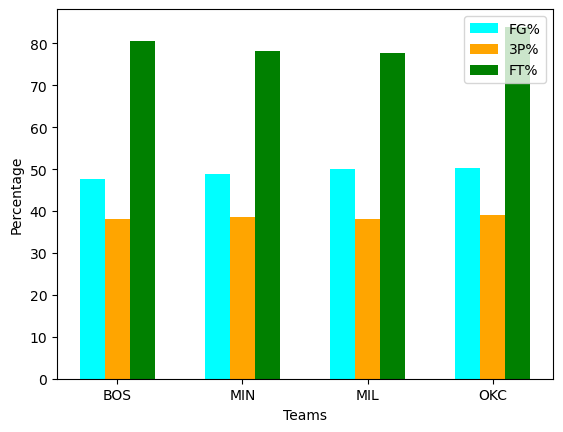

In [129]:
# create data 
#FGP = ChampionContenders["FG%"]
#ThreePP = ChampionContenders["3P%"]
#FTP = ChampionContenders["FT%"]

x = np.arange(4) 
y1 = [FGP[0], FGP[1], FGP[2], FGP[3]] 
y2 = [ThreePP[0], ThreePP[1], ThreePP[2], ThreePP[3]] 
y3 = [FTP[0], FTP[1], FTP[2], FTP[3]] 
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width, color='cyan') 
plt.bar(x, y2, width, color='orange') 
plt.bar(x+0.2, y3, width, color='green') 
plt.xticks(x, [Teams[0], Teams[1], Teams[2], Teams[3]]) 
plt.xlabel("Teams") 
plt.ylabel("Percentage") 
plt.legend(["FG%", "3P%", "FT%"]) 
plt.show() 

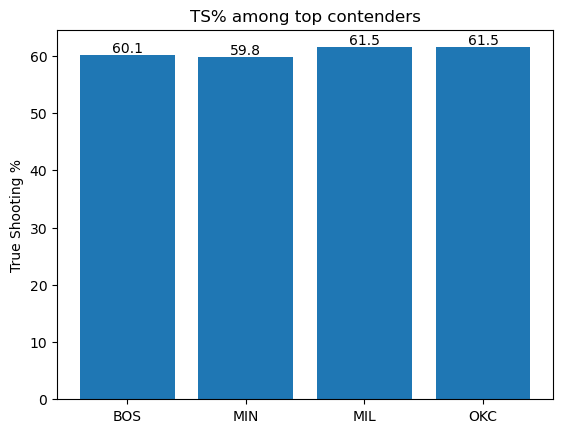

In [130]:
fig, ax = plt.subplots()

Teams = [Teams[0], Teams[1], Teams[2], Teams[3]]
Percentage = [TSP[0], TSP[2], TSP[3], TSP[4]]
bar_labels = ['green', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange']

ax.bar(Teams, Percentage, label=bar_labels, color=bar_colors)

ax.set_ylabel('True Shooting %')
ax.set_title('TS% among top contenders')
bar_container = ax.bar(Teams, Percentage)
ax.bar_label(bar_container)

plt.show()